In [212]:
#----------------------------#
# Author: Surjit Das
# Email: surjitdas@gmail.com
# Program: artmind
#----------------------------#

import spacy
from spacy import displacy
SUBJECT = "SUBJECT"
PREDICATE = "PREDICATE"
OBJECT = "OBJECT"
NER = "NER"
nlp = spacy.load("en_core_web_trf")

def pos_it(doc):
    print("|token.text| token.pos_| token.tag_ | token.dep_| token.head.text|")
    for token in doc:
        print(f"|{token.text:<12}| {token.pos_:<10}| {token.tag_:<10}| {token.dep_:<10}| {token.head.text:<12}|")

def chunk_it(doc):
    print(f"|chunk.text:24|chunk.root.text:12|chunk.root.dep_:10|")
    for chunk in doc.noun_chunks:
        print(f"|{chunk.text:24}|{chunk.root.text:12}|{chunk.root.dep_:10}|")

def meaning(doc):
    subject = []
    subject_words = []
    object_words = []
    predicate = []
    object_ = []
    
    for chunk in doc.noun_chunks:
        if 'subj' in chunk.root.dep_:
            subject.append(chunk.text)
            subject_words.extend(chunk.text.split())
        elif 'obj' in chunk.root.dep_ or 'attr' in chunk.root.dep_:
            object_.append(chunk.text)
            object_words.extend(chunk.text.split())
        else:
            predicate.append(chunk.text)

    print(f"{subject_words=}, {object_words=}")

    # for token in doc:
    #     if token.text not in (subject_words + object_words):
    #         # print(f"Inside {token.text=}")
    #         if 'subj' in token.dep_:
    #             subject.append(token.text)
    #             subject_words.append(token.text)
    #         elif 'obj' in token.dep_:
    #             object_.append(token.text)
    #             object_words.append(token.text)
    #         # else:
    #         #     predicate.append(token.text)
    
    _MODS_ = ['acl','advcl', 'advmod', 'oprd', 'xcomp']
    for token in doc:
        if 'ROOT' == token.dep_: # and token.pos_ != 'AUX':
            predicate.append(token.text)
            for child in token.children:
                print(f"{child.text=}, {subject=}, {predicate=}")
                if child.text not in (subject_words + object_words) and child.text not in predicate and child.pos_ not in ['ADP', 'AUX']:
                    predicate.append(child.text)
        elif token.dep_ in _MODS_ and (token.text not in (subject_words + object_words) and token.text not in predicate):
            print(f"{token.text=}")
            predicate.append(token.text)

    ner_dict = {NER:[{ent.text: ent.label_} for ent in doc.ents]}

    interpretation = [
            {SUBJECT:subject},
            {PREDICATE:predicate},
            {OBJECT:object_},
            ner_dict
            ]
    
    # print(interpretation)
    return interpretation

In [206]:
POS_SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
POS_PREDICATES = ["prep","cc", "mark"]
POS_OBJECTS = ["pobj", "dative","oprd"]
POS_ATTRIBUTES = ["attr"]
POS_ACTIVITIES = ["dobj", "conj"]

def reset_phrases():
    return "","-","","",""

def reset_flags():
    return False, True, False, False, False

def sentencer(doc):
    subject_phrase, link_phrase, object_phrase, attribute_phrase, activity_phrase = reset_phrases()
    # is_subject, is_link, is_object, is_attribute, is_activity = reset_flags()
    triplets = []
    current_phrase = ""
    current_source_link = ""

    for token in doc:
        current_phrase = f"{current_phrase} {token.text}"
        print(f"1. {current_phrase=}")

        if token.dep_ in POS_SUBJECTS:
            subject_phrase = current_phrase.lstrip()
            current_phrase = ""
            current_source_link = subject_phrase
            print(f"2. {subject_phrase=}")
        
        if token.dep_ in POS_PREDICATES:
            link_phrase = current_phrase.lstrip()
            current_phrase = ""
            print(f"3. {link_phrase=}")

        if token.dep_ in POS_OBJECTS:
            object_phrase = current_phrase.lstrip()
            current_phrase = ""
            print(f"4. {object_phrase=}")

        if token.dep_ in POS_ATTRIBUTES:
            attribute_phrase = current_phrase.lstrip()
            current_phrase = ""
            print(f"5. {attribute_phrase=}")
        
        if token.dep_ in POS_ACTIVITIES:
            activity_phrase = current_phrase.lstrip()
            current_phrase = ""
            print(f"6. {activity_phrase=}")

        if len(current_source_link)>0 and len(link_phrase)>0 and (len(object_phrase)>0 or len(attribute_phrase)>0 or len(activity_phrase)>0):
            triplet = [current_source_link, link_phrase, object_phrase, attribute_phrase, activity_phrase]
            print(f"7. {triplet=}")
            triplets.append(triplet)
            subject_phrase, link_phrase, object_phrase, attribute_phrase, activity_phrase = reset_phrases()

        
        print(f"8. {current_source_link=}, {subject_phrase=}, {link_phrase=}, {object_phrase=}, {attribute_phrase=}, {activity_phrase=}")
        
    return triplets


In [228]:
# text = "Diwali is generally a time for visits, gifts, new clothes, feasts, feeding the poor, and lighting fireworks"
# text = "Mumbai is the financial capital of India"
# text = "IBM is a very large company headquartered in USA"
# text = "IBM's headquarters are in USA"
# text = "Donald Trump isn't the worst president of USA, but Hillary Clinton is better than him"
text = "Thriller is a hit album of Michael Jackson, released in early 1984"
# text = "Mortgage renewal process starts 120 days prior to end of term"
# text = "Diwali is known as the Festival of Lights, as people light lamps in their homes and worship Godess Lakshmi"
# text = "Surjit Das is brother of Neha Das"
# text = "Surjit is Neha Das' brother" # This requires pre-processing.  token 's -> assign to predicate and attr too.
# text = "Justin went into a fight unnecessarily"
# text = "Once upon a time there were three bears"

In [230]:
doc = nlp(text)
pos_it(doc)
# chunk_it(doc)
print(meaning(doc))
# print(sentencer(doc))
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

|token.text| token.pos_| token.tag_ | token.dep_| token.head.text|
|Once        | ADV       | RB        | advmod    | were        |
|upon        | SCONJ     | IN        | prep      | Once        |
|a           | DET       | DT        | det       | time        |
|time        | NOUN      | NN        | pobj      | upon        |
|there       | PRON      | EX        | expl      | were        |
|were        | AUX       | VBD       | ROOT      | were        |
|three       | NUM       | CD        | nummod    | bears       |
|bears       | NOUN      | NNS       | attr      | were        |
subject_words=[], object_words=['a', 'time', 'three', 'bears']
token.text='Once'
child.text='Once', subject=[], predicate=['Once', 'were']
child.text='there', subject=[], predicate=['Once', 'were']
child.text='bears', subject=[], predicate=['Once', 'were', 'there']
[{'SUBJECT': []}, {'PREDICATE': ['Once', 'were', 'there']}, {'OBJECT': ['a time', 'three bears']}, {'NER': []}]


In [3]:
# pos_it("It is Diwali today in India. We celebrate this festival with great fervour. It is know as the 'Festival of Lights', as people light lamps in their homes and worship Godess Lakshmi. It is also the New Year for Gujratis. Retailers look forward to this festival, as people go on a shopping spree. Diwali is generally a time for visiting, exchanging gifts, wearing new clothes, feasting, feeding the poor, and setting off fireworks.")
pos_it("We celebrate this festival with great fervour")

|token.text| token.pos_| token.dep_| token.head.text|
|We          | PRON      | nsubj     | celebrate   |
|celebrate   | VERB      | ROOT      | celebrate   |
|this        | DET       | det       | festival    |
|festival    | NOUN      | dobj      | celebrate   |
|with        | ADP       | prep      | celebrate   |
|great       | ADJ       | amod      | fervour     |
|fervour     | NOUN      | pobj      | with        |


In [5]:
meaning("It is Diwali today in India")
meaning("Today it is Diwali in India")
meaning("We celebrate this festival with great fervour")


[{'SUBJECT': ['It']}, {'PREDICATE': ['Diwali']}, {'OBJECT': ['India']}, {'NER': [{'Diwali today': 'DATE'}, {'India': 'GPE'}]}]
[{'SUBJECT': ['it']}, {'PREDICATE': ['Diwali']}, {'OBJECT': ['India']}, {'NER': [{'Diwali': 'DATE'}, {'India': 'GPE'}]}]
[{'SUBJECT': ['We']}, {'PREDICATE': ['celebrate', 'festival']}, {'OBJECT': ['this festival', 'great fervour']}, {'NER': []}]


[{'SUBJECT': ['We']},
 {'PREDICATE': ['celebrate', 'festival']},
 {'OBJECT': ['this festival', 'great fervour']},
 {'NER': []}]

In [5]:
meaning("It is Diwali today in India. We celebrate this festival with great fervour. It is know as the 'Festival of Lights', as people light lamps in their homes and worship Godess Lakshmi. It is also the New Year for Gujratis. Retailers look forward to this festival, as people go on a shopping spree. Diwali is generally a time for visiting, exchanging gifts, wearing new clothes, feasting, feeding the poor, and setting off fireworks.")

[{'SUBJECT': ['It', 'We', 'It', 'people', 'It', 'Retailers', 'people', 'Diwali']}, {'PREDICATE': ['Diwali', 'today', 'the New Year', 'a time', 'celebrate', 'We', 'festival', '.', 'know', 'It', "'", ',', 'light', 'also', 'look', 'Retailers', 'forward', 'go', 'generally']}, {'OBJECT': ['India', 'this festival', 'great fervour', "the 'Festival", 'Lights', 'lamps', 'their homes', 'Godess Lakshmi', 'Gujratis', 'this festival', 'a shopping spree', 'gifts', 'new clothes', 'fireworks']}, {'NER': [{'Diwali today': 'DATE'}, {'India': 'GPE'}, {'Lakshmi': 'PERSON'}, {'the New Year': 'DATE'}, {'Gujratis': 'NORP'}, {'Diwali': 'DATE'}]}]


[{'SUBJECT': ['It',
   'We',
   'It',
   'people',
   'It',
   'Retailers',
   'people',
   'Diwali']},
 {'PREDICATE': ['Diwali',
   'today',
   'the New Year',
   'a time',
   'celebrate',
   'We',
   'festival',
   '.',
   'know',
   'It',
   "'",
   ',',
   'light',
   'also',
   'look',
   'Retailers',
   'forward',
   'go',
   'generally']},
 {'OBJECT': ['India',
   'this festival',
   'great fervour',
   "the 'Festival",
   'Lights',
   'lamps',
   'their homes',
   'Godess Lakshmi',
   'Gujratis',
   'this festival',
   'a shopping spree',
   'gifts',
   'new clothes',
   'fireworks']},
 {'NER': [{'Diwali today': 'DATE'},
   {'India': 'GPE'},
   {'Lakshmi': 'PERSON'},
   {'the New Year': 'DATE'},
   {'Gujratis': 'NORP'},
   {'Diwali': 'DATE'}]}]

In [6]:
from timefhuman import timefhuman as th
th("thursday") # works
th("1 week ago") # does not work
th("today") # works

datetime.datetime(2021, 11, 15, 0, 0)

In [6]:
text = "Mortgage renewal process starts 120 days prior to end of term"
pos_it(text)
meaning(text)

|token.text| token.pos_| token.dep_| token.head.text|
|Mortgage    | NOUN      | compound  | renewal     |
|renewal     | NOUN      | compound  | process     |
|process     | NOUN      | nsubj     | starts      |
|starts      | VERB      | ROOT      | starts      |
|120         | NUM       | nummod    | days        |
|days        | NOUN      | npadvmod  | prior       |
|prior       | ADV       | advmod    | starts      |
|to          | ADP       | prep      | prior       |
|end         | NOUN      | pobj      | to          |
|of          | ADP       | prep      | end         |
|term        | NOUN      | pobj      | of          |
[{'SUBJECT': ['Mortgage renewal process']}, {'PREDICATE': ['starts', 'prior']}, {'OBJECT': ['end', 'term']}, {'NER': [{'120 days': 'DATE'}]}]


[{'SUBJECT': ['Mortgage renewal process']},
 {'PREDICATE': ['starts', 'prior']},
 {'OBJECT': ['end', 'term']},
 {'NER': [{'120 days': 'DATE'}]}]

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(G, title=None):
    # set figure size
    plt.figure(figsize=(10,5))
    
    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G)
    
    # draw nodes and edges
    nx.draw(G, pos=pos, with_labels=True)
    
    # get edge labels (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    
    # draw edge labels (if any)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # plot the title (if any)
    plt.title(title)
    
    plt.show()
    return

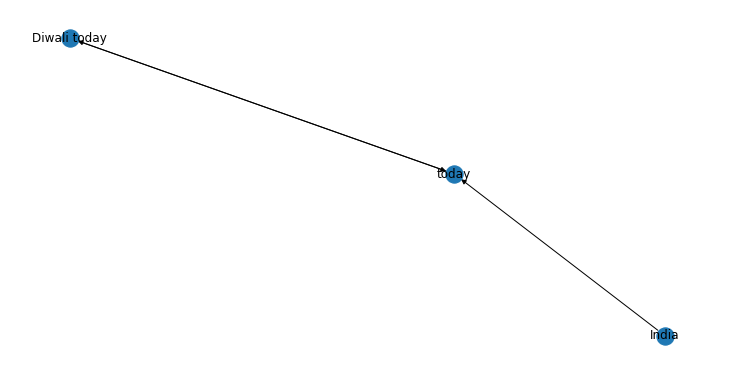

('Diwali today', {'type': 'Noun'})
('today', {'type': 'Noun'})
('India', {'type': 'Noun'})


In [51]:
nouns = ["Diwali today","today","India"]
G = nx.MultiDiGraph()
G.add_nodes_from(nouns, type="Noun")
G.add_edge("India","today",label="is")
G.add_edge("Diwali today","today",label="within")
G.add_edge("today","Diwali today",label="festival")
plot_graph(G)
for node in G.nodes(data=True):
    print(node)

if "Diwali" in G:
    print("Found it")

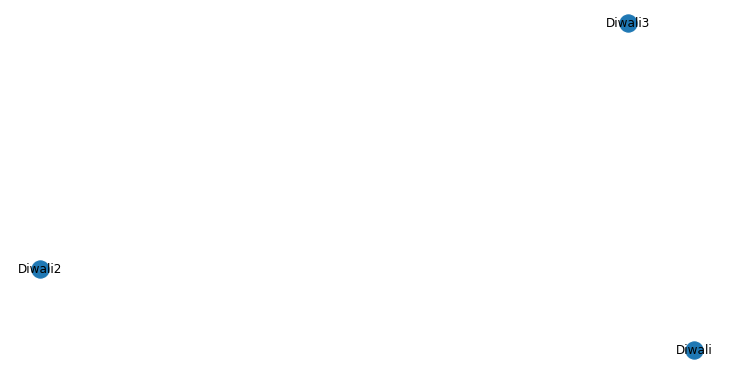

{'type': 'Entity', 'wd': 'b'}


In [28]:
nouns = [['Diwali', {'wd': {'festival': ['recurring event', 'event'], 'holiday': ['recurring event']}}],['Diwali2', {'wd': "a"}]]
G = nx.Graph()
G.add_nodes_from(nouns, type="Entity")
nouns = [['Diwali', {'wd': {'festival': ['recurring event'], 'holiday': ['recurring event','cheap']}}],['Diwali3', {'wd': "b"}]]
G.add_nodes_from(nouns, type="Entity")
plot_graph(G)
# for node in G.nodes(data=True):
#     print(node)
#     print(node[0])
#     for attr in node[1]:
#         print(attr, node[1][attr])
n = dict(G.nodes())['Diwali3']
print(n)

In [11]:
import nlu_processor as nlup

In [12]:
nlup.get_wikidata("Apple")

{'corporation': ['juridical person',
  'company',
  'separate legal entity',
  'organization',
  'legal person',
  'structure',
  'group of humans',
  'person or organization',
  'agent',
  'subject of a right',
  'entity',
  'group of living things',
  'individual entity',
  'subject',
  'continuant',
  'group of physical objects',
  'group',
  'group or class of physical objects',
  'set',
  'collective entity'],
 'trademark': ['symbol',
  'intellectual property',
  'protected name',
  'sign',
  'image',
  'intangible asset',
  'property',
  'name',
  'information',
  'abstract object',
  'word',
  'asset',
  'image',
  'goods',
  'object',
  'non-physical entity',
  'phrase',
  'lexical item',
  'goods and services',
  'resource',
  'entity',
  'signal',
  'data',
  'signal',
  'constituent',
  'language device',
  'linguistic unit',
  'source',
  'continuant',
  'spatio-temporal entity',
  'lexeme',
  'emic unit',
  'mental object',
  'individual entity',
  'class',
  'collective e

In [13]:
nlup.wikifier("Apple")

[{'wikiDataClasses': ['enterprise',
   'business',
   'organization',
   'operation',
   'juridical person',
   'economic unit',
   'agent',
   'group of humans',
   'organizational unit',
   'economic agent',
   'goods',
   'legal person',
   'legal form',
   'unit',
   'individual entity',
   'group of living things',
   'subject',
   'perceptible object',
   'subject of a right',
   'class',
   'abstract object',
   'entity',
   'group of physical objects',
   'structure',
   'physical object',
   'class',
   'object',
   'group',
   'concrete object',
   'physical system',
   'system',
   'scientific object',
   'structure'],
  'DBPEDIATYPES': ['Agent', 'Organisation', 'Company']}]

In [12]:
import requests
CONCEPTNET_API_ENDPOINT_URL = "http://api.conceptnet.io/c/en/"

entity_name = "duck"
limit = 5

url = CONCEPTNET_API_ENDPOINT_URL + entity_name + "?limit=" + str(limit)
print(url)
response = requests.get(url)
response.json()

http://api.conceptnet.io/c/en/duck?limit=5


{'@context': ['http://api.conceptnet.io/ld/conceptnet5.7/context.ld.json'],
 'error': {'details': 'Internal server error', 'status': 500},
 'version': '5.8.1'}

In [29]:
import urllib, json
threshold = 0.8
lang = "en"
text = "sea"
data = urllib.parse.urlencode([
    ("text", text), ("lang", lang),
    ("userKey", "vvswrnlywccfgddhmprbdwviamhnuc") # this is my userkey
    ,
    ("pageRankSqThreshold", "%g" %
        threshold), ("applyPageRankSqThreshold", "false"), # This flag is important - true seems to filter out a lot
    ("nTopDfValuesToIgnore", "100"), ("nWordsToIgnoreFromList", "100"),
    ("wikiDataClasses", "true"), ("wikiDataClassIds", "false"),
    ("support", "true"), ("ranges", "false"), ("minLinkFrequency", "2"),
    ("includeCosines", "false"), ("maxMentionEntropy", "3")
])
url = "http://www.wikifier.org/annotate-article"
# Call the Wikifier and read the response.
req = urllib.request.Request(url, data=data.encode("utf8"), method="POST")
with urllib.request.urlopen(req, timeout=60) as f:
    response = f.read()
    response = json.loads(response.decode("utf8"))


In [30]:
response

{'annotations': [{'title': 'Sea',
   'url': 'http://en.wikipedia.org/wiki/Sea',
   'lang': 'en',
   'pageRank': 0.1203093698902812,
   'secLang': 'en',
   'secTitle': 'Sea',
   'secUrl': 'http://en.wikipedia.org/wiki/Sea',
   'wikiDataItemId': 'Q165',
   'wikiDataClasses': [],
   'dbPediaTypes': [],
   'dbPediaIri': 'http://dbpedia.org/resource/Sea',
   'supportLen': 1,
   'support': [{'wFrom': 0,
     'wTo': 0,
     'chFrom': 0,
     'chTo': 2,
     'pMentionGivenSurface': 0.003741906626883908,
     'pageRank': 0.09999999999999999,
     'prbConfidence': 0.133677077655868,
     'entropy': 1.22506605644113}]}],
 'spaces': ['', ''],
 'words': ['sea'],
 'normWords': ['sea'],
 'ranges': [],
 'minPageRank': 0,
 'maxDfThreshold': -1,
 'altLabelSetsUsed': [],
 'linkSourcesAvailable': True,
 'timeTotalMs': 23.689,
 'timeAnnotationMs': 23.689,
 'timeBuildJsonMs': 0,
 'incIdxTimestampUtc': '',
 'fnRegIdx': 'enwiki-20211020-pages-articles-index3.bin',
 'fnWikiData': 'wikidata-20200803-all.bin',
 

In [24]:
wk_dict = {"wikiDataClasses":[],"dbPediaTypes":[]}
for record in response["annotations"]:
    # print(record)
    wdClassList = []
    wikiDataClasses = record['wikiDataClasses']
    for item in wikiDataClasses:
        wdClassList.append(item['enLabel'])
    dbpTypeList = record['dbPediaTypes']

    wk_dict['wikiDataClasses'].extend(wdClassList)
    wk_dict['dbPediaTypes'].extend(dbpTypeList)
wk_dict

{'wikiDataClasses': ['festival',
  'holiday',
  'recurring event',
  'organization',
  'day',
  'event',
  'periodic process',
  'agent',
  'group of humans',
  'time interval',
  'social phenomenon',
  'occurrence',
  'process',
  'individual entity',
  'group of living things',
  'temporal entity',
  'property',
  'phenomenon',
  'occurrent',
  'entity',
  'group of physical objects',
  'structure',
  'spatio-temporal entity',
  'phenomenon',
  'group',
  'object'],
 'dbPediaTypes': ['Holiday']}

In [3]:
wikifier_dict_list = []
for record in response["annotations"]:
    # print(record)
    wk_dict = {}
    wdClassList = []
    wikiDataClasses = record['wikiDataClasses']
    for item in wikiDataClasses:
        wdClassList.append(item['enLabel'])
    dbpTypeList = record['dbPediaTypes']
    wk_dict['wikiDataClasses'] = wdClassList
    wk_dict['dbPediaTypes'] = dbpTypeList
    wikifier_dict_list.append(wk_dict)

wikifier_dict_list
    

{'title': 'Diwali', 'url': 'http://en.wikipedia.org/wiki/Diwali', 'lang': 'en', 'pageRank': 0.7416836334405144, 'secLang': 'en', 'secTitle': 'Diwali', 'secUrl': 'http://en.wikipedia.org/wiki/Diwali', 'wikiDataItemId': 'Q10244', 'wikiDataClasses': [{'itemId': 'Q132241', 'enLabel': 'festival'}, {'itemId': 'Q1445650', 'enLabel': 'holiday'}, {'itemId': 'Q15275719', 'enLabel': 'recurring event'}, {'itemId': 'Q43229', 'enLabel': 'organization'}, {'itemId': 'Q573', 'enLabel': 'day'}, {'itemId': 'Q1656682', 'enLabel': 'event'}, {'itemId': 'Q12044624', 'enLabel': 'periodic process'}, {'itemId': 'Q24229398', 'enLabel': 'agent'}, {'itemId': 'Q16334295', 'enLabel': 'group of humans'}, {'itemId': 'Q186081', 'enLabel': 'time interval'}, {'itemId': 'Q602884', 'enLabel': 'social phenomenon'}, {'itemId': 'Q1190554', 'enLabel': 'occurrence'}, {'itemId': 'Q67518233', 'enLabel': 'process'}, {'itemId': 'Q23958946', 'enLabel': 'individual entity'}, {'itemId': 'Q16334298', 'enLabel': 'group of living things'

[{'wikiDataClasses': ['festival',
   'holiday',
   'recurring event',
   'organization',
   'day',
   'event',
   'periodic process',
   'agent',
   'group of humans',
   'time interval',
   'social phenomenon',
   'occurrence',
   'process',
   'individual entity',
   'group of living things',
   'temporal entity',
   'property',
   'phenomenon',
   'occurrent',
   'entity',
   'group of physical objects',
   'structure',
   'spatio-temporal entity',
   'phenomenon',
   'group',
   'object'],
  'dbPediaTypes': ['Holiday']}]

In [17]:
import conceptnet_lite
conceptnet_lite.connect("/Volumes/Surjit_SSD_1/tech/conceptnet.db")

In [18]:
from conceptnet_lite import Label

cat_concepts = Label.get(text='cat', language='en').concepts  
for c in cat_concepts:
#     print("    Concept URI:", c.uri)
#     print("    Concept text:", c.text)
#     print("    Concept language:", c.language.name)
    e = c.edges_out
    for i in e:
        print(i)

/a/[/r/antonym/,/c/en/cat/,/c/en/dog/]
/a/[/r/antonym/,/c/en/cat/,/c/en/garfield/]
/a/[/r/at_location/,/c/en/cat/,/c/en/africa/]
/a/[/r/at_location/,/c/en/cat/,/c/en/alley/]
/a/[/r/at_location/,/c/en/cat/,/c/en/alleyway/]
/a/[/r/at_location/,/c/en/cat/,/c/en/ally/]
/a/[/r/at_location/,/c/en/cat/,/c/en/american_home/]
/a/[/r/at_location/,/c/en/cat/,/c/en/animal_rescue_shelter/]
/a/[/r/at_location/,/c/en/cat/,/c/en/animal_shops/]
/a/[/r/at_location/,/c/en/cat/,/c/en/apartment/]
/a/[/r/at_location/,/c/en/cat/,/c/en/appartment/]
/a/[/r/at_location/,/c/en/cat/,/c/en/appartments/]
/a/[/r/at_location/,/c/en/cat/,/c/en/arms/]
/a/[/r/at_location/,/c/en/cat/,/c/en/arms_of_human/]
/a/[/r/at_location/,/c/en/cat/,/c/en/art/]
/a/[/r/at_location/,/c/en/cat/,/c/en/attic/]
/a/[/r/at_location/,/c/en/cat/,/c/en/back_alley/]
/a/[/r/at_location/,/c/en/cat/,/c/en/back_yard/]
/a/[/r/at_location/,/c/en/cat/,/c/en/backyard/]
/a/[/r/at_location/,/c/en/cat/,/c/en/bag/]
/a/[/r/at_location/,/c/en/cat/,/c/en/barn/]

In [31]:
from conceptnet_lite import Label, edges_for
text = 'people'
for e in edges_for(Label.get(text=text, language='en').concepts, same_language=True):
    if(e.start.text == text):
        print(f"{e.start.text}-({e.relation.name})->{e.end.text}")

people-(synonym)->people
people-(manner_of)->people
people-(antonym)->animal
people-(antonym)->animals
people-(antonym)->person
people-(at_location)->anus
people-(at_location)->apartment
people-(at_location)->audience
people-(at_location)->bookstore
people-(at_location)->building
people-(at_location)->buildings
people-(at_location)->bus_depot
people-(at_location)->bus_stop
people-(at_location)->car_show
people-(at_location)->carnival
people-(at_location)->city
people-(at_location)->classroom
people-(at_location)->conference
people-(at_location)->confession
people-(at_location)->convention
people-(at_location)->crowds
people-(at_location)->disneyland
people-(at_location)->end_of_line
people-(at_location)->fair
people-(at_location)->football_stadium
people-(at_location)->funeral
people-(at_location)->gallery_opening
people-(at_location)->ground
people-(at_location)->hawaii
people-(at_location)->hockey_game
people-(at_location)->hospital
people-(at_location)->kosher_delicatessen
people-(a

In [6]:
import pandas as pd
df = pd.DataFrame(columns=["a","b"])
row = {"a":"x", "b":"y"}
df = df.append(row, ignore_index=True)
df

,a,b
0,x,y


In [22]:
list1 = {"a":1,"b":2}
list2 = {"a":3,"c":4}
list(zip(list1))

[('a',), ('b',)]

In [36]:
import sqlite3
import pandas as pd
SQL_LOCAL_DB = "/Users/surjitdas/Downloads/nlu_processor1.db"
db = sqlite3.connect(SQL_LOCAL_DB)
COLUMNS = ["token.text","token.dep_","token.pos_"]
text_df = pd.DataFrame(columns=COLUMNS)
row = {"token.text":"aebc","token.dep_":str(["dwwef","sfsdf"]),"token.pos_":304}
text_df = text_df.append(row, ignore_index=True)
text_df.to_sql("paragraph",db,if_exists="append")

In [21]:
import pandas as pd
import math
df = pd.DataFrame({"A":[1,2,3], "B":["a","b","c"]})
row = {"A":4}
df = df.append(row, ignore_index=True)
if str(df["B"][3])=='nan':
    print("found nan")

for index, row in df.iterrows():
    print(row["B"])


found nan
a


TypeError: must be real number, not str

In [19]:
import pandas as pd
import math
import sqlite3
import uuid
SQL_LOCAL_DB = "/Users/surjitdas/Downloads/nlu_processor/test.db"
df = pd.DataFrame({"A":[1,2,3], "B":["a","b","c"], "C":["x","b2","c4"]})
row = {}
row["A"] = 4
row["B"] = str(uuid.uuid4())
df = df.append(row, ignore_index=True)
print(df.to_string())
db = sqlite3.connect(SQL_LOCAL_DB)
df.to_sql("test1", db, index=False, if_exists="append")

   A                                     B    C
0  1                                     a    x
1  2                                     b   b2
2  3                                     c   c4
3  4  aa1dc506-f132-48b0-887e-c8e80b727655  NaN


In [29]:
item = ("'a'",)
sql_str = "select * from test1 where B = ?"
df = pd.read_sql(sql_str,db,params=item)
if len(df) == 0:
    ...
else:
    x = df["A"][0]
    print(x)

In [30]:
import ast
x = "['abc','def']"
y = ast.literal_eval(x)
y

['abc', 'def']

In [39]:
a = []
print(a[:7])


[]


In [116]:
from spacy import displacy
import spacy
nlp = spacy.load("en_core_web_trf")

ROOT = "ROOT"
SUBJECT = "SUBJECT"
PREDICATE = "PREDICATE"
OBJECT = "OBJECT"
COMPOUND = "COMPOUND"
MODIFIER = "MODIFIER"
SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
OBJECTS = ["dobj", "pobj", "dative", "oprd", "attr"] #attr - is an interesting one as Object, removing this makes attr as PREDICATE
COMPOUNDS = ["compound"]
MODIFIERS = ["amod", "advmod", "nummod"]
EXCLUSIONS = ["det", "punct"]
# ADJECTIVES = ["acomp", "advcl", "advmod", "amod", "appos", "nn", "nmod", "ccomp", "complm",
#               "hmod", "infmod", "xcomp", "rcmod", "poss"," possessive"]
# PREPOSITIONS = ["prep"]
# "attr" removed from OBJECTS list. It is further qualifying a predicate or verb

def get_keytype(dep):
    key = ""
    if dep == ROOT:
        key = ROOT
    elif dep in SUBJECTS:
        key = SUBJECT
    elif dep in OBJECTS:
        key = OBJECT
    elif dep in COMPOUNDS:
        key = COMPOUND
    elif dep in MODIFIERS:
        key = MODIFIER
    else:
        key = PREDICATE
    return key

In [117]:
def dfs(token, context):
    item = {}
    key = get_keytype(token.dep_)
    for x,y in context[-1].items():
        last_key = x
        last_value = y
    print(f"key, token.text: {key, token.text}, context: {context}, last_key, last_value: {last_key, last_value}")
    # print(f"context[-1]:{context[-1]}, list(context[-1]): {list(context[-1])}")
    if key == ROOT:
        print("Skipping as key is ROOT...")
    elif last_key != key:
        if (key == COMPOUND): 
            value = f"{token.text} {last_value}"
            print(f"COMPOUND : {last_key}:{value}")
            context[-1] = {last_key:value}
        elif (key == MODIFIER and token in token.head.lefts):
            value = f"{token.text} {last_value}"
            print(f"MODIFIER : {last_key}:{value}")
            context[-1] = {last_key:value}
        else:
            if key == MODIFIER:
                key = PREDICATE
            item[key] = token.text
            print(f"context.append(item): {item}")
            context.append(item)
    else: # if last_key == key
        value = f"{last_value} {token.text}"
        print(f"if last_key == key: key:value : {key}:{value}")
        context[-1] = {key:value}
    print(f"context after adding: {context}")

    for child in token.children:
        # print(f"exploring child {child.text}")
        if(child.dep_ not in EXCLUSIONS):
            dfs(child,context)
    return context


# def process_context(context, spo_list):
#     for item in context:
        
#     return spo_list

In [118]:
# text = "IBM is a very large company that is headquartered in USA"
# text = "IBM is a very large company headquartered in USA"
# text = "IBM is headquartered in USA"
# text = "It is Diwali today in India"
# text = "Mumbai is the capital of Maharashtra"
# text = "Mumbai is the financial capital of India"
# text = "Gujratis go on a shopping spree during Diwali"
text = "Diwali is generally a time for visits, exchanging gifts, wearing new clothes, attending feasts, feeding the poor, and lighting fireworks."
# text = "Diwali is time for brand new clothes and attending feasts"
# text = "Diwali is time for extremely expensive clothes, attending feasts"
# text = "Donald Trump is the worst president of USA"
# text = "Donald Trump isn't the worst president of USA, but Hillary is better than him"
# text = "Baby One More Time is a song by Britney Spears" # This is a difficult one, NER should override as NER recognises Baby One More Time, but Depenency Parsing (DP) is a mess
# text = "Thriller is a hit album of Michael Jackson, released in 1984"
# text = "We have a working prototype of a rocket"
# text = "Diwali is known as the Festival of Lights, as people light lamps in their homes and worship Godess Lakshmi"
text = "Mortgage renewal process starts 120 days prior to end of term"
text = "Once upon a time there were three bears"
doc = nlp(text)
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

for token in doc:
    if (token.dep_ == "ROOT"):
        print (f"{token.text} is the root")
        context = dfs(token,context=[{"ROOT":token.text}])
        print(f"Final context: {context}")
    # print(token.text, token.dep_, spacy.explain(token.dep_), token.pos_, list(token.children), token.left_edge, list(token.lefts), token.right_edge, list(token.rights))
    # print(token.text, token.dep_, spacy.explain(token.dep_), token.pos_, list(token.head.lefts))




were is the root
key, token.text: ('ROOT', 'were'), context: [{'ROOT': 'were'}], last_key, last_value: ('ROOT', 'were')
Skipping as key is ROOT...
context after adding: [{'ROOT': 'were'}]
key, token.text: ('MODIFIER', 'Once'), context: [{'ROOT': 'were'}], last_key, last_value: ('ROOT', 'were')
MODIFIER : ROOT:Once were
context after adding: [{'ROOT': 'Once were'}]
key, token.text: ('PREDICATE', 'upon'), context: [{'ROOT': 'Once were'}], last_key, last_value: ('ROOT', 'Once were')
context.append(item): {'PREDICATE': 'upon'}
context after adding: [{'ROOT': 'Once were'}, {'PREDICATE': 'upon'}]
key, token.text: ('OBJECT', 'time'), context: [{'ROOT': 'Once were'}, {'PREDICATE': 'upon'}], last_key, last_value: ('PREDICATE', 'upon')
context.append(item): {'OBJECT': 'time'}
context after adding: [{'ROOT': 'Once were'}, {'PREDICATE': 'upon'}, {'OBJECT': 'time'}]
key, token.text: ('SUBJECT', 'there'), context: [{'ROOT': 'Once were'}, {'PREDICATE': 'upon'}, {'OBJECT': 'time'}], last_key, last_val

In [119]:
def breakit (item):
    key = ""
    value = ""
    for x, y in item.items():
        key = x
        value = y
    return key, value


In [121]:
# x = [{'ROOT': 'is'}, {'SUBJECT': 'Thriller'}, {'OBJECT': 'hit album'}, {'PREDICATE': 'of'}, {'OBJECT': 'Michael Jackson'}, {'PREDICATE': 'released in'}, {'OBJECT': '1984'}]
# x = [{'ROOT': 'have'}, {'SUBJECT': 'We'}, {'OBJECT': 'working prototype'}, {'PREDICATE': 'of'}, {'OBJECT': 'rocket'}]
x = [{'ROOT': 'is'}, {'SUBJECT': 'Donald Trump'}, {'PREDICATE': "n't"}, {'OBJECT': 'worst president'}, {'PREDICATE': 'of'}, {'OBJECT': 'USA'}, {'PREDICATE': 'but is'}, {'SUBJECT': 'Hillary'}, {'PREDICATE': 'better than'}, {'OBJECT': 'him'}]
# x = [{'ROOT': 'is'}, {'SUBJECT': 'Mumbai'}, {'OBJECT': 'financial capital'}, {'PREDICATE': 'of'}, {'OBJECT': 'India'}]
# x = [{'ROOT': 'is'}, {'SUBJECT': 'Diwali'}, {'PREDICATE': 'generally'}, {'OBJECT': 'time'}, {'PREDICATE': 'for'}, {'OBJECT': 'visits'}, {'PREDICATE': 'exchanging'}, {'OBJECT': 'gifts'}, {'PREDICATE': 'wearing'}, {'OBJECT': 'new clothes'}, {'PREDICATE': 'attending'}, {'OBJECT': 'feasts'}, {'PREDICATE': 'feeding'}, {'OBJECT': 'poor'}, {'PREDICATE': 'and lighting'}, {'OBJECT': 'fireworks'}]
# x = [{'ROOT': 'headquartered'}, {'SUBJECT': 'IBM'}, {'PREDICATE': 'is in'}, {'OBJECT': 'USA'}]
# x = [{'ROOT': 'is'}, {'SUBJECT': 'IBM'}, {'OBJECT': 'very large company'}, {'PREDICATE': 'headquartered'}, {'SUBJECT': 'that'}, {'PREDICATE': 'is in'}, {'OBJECT': 'USA'}]
# x = [{'ROOT': 'is'}, {'SUBJECT': 'Donald Trump'}, {'PREDICATE': "n't"}, {'OBJECT': 'worst president'}, {'PREDICATE': 'of'}, {'OBJECT': 'USA'}, {'PREDICATE': 'but is'}, {'SUBJECT': 'Hillary'}, {'PREDICATE': 'better than'}, {'OBJECT': 'him'}]
x = [{'ROOT': 'starts'}, {'SUBJECT': 'Mortgage renewal process'}, {'PREDICATE': '120 prior days to'}, {'OBJECT': 'end'}, {'PREDICATE': 'of'}, {'OBJECT': 'term'}]
x = [{'ROOT': 'Once were'}, {'PREDICATE': 'upon'}, {'OBJECT': 'time'}, {'SUBJECT': 'there'}, {'OBJECT': 'three bears'}]
print(f"{x[0]=}")
key0, value0 = breakit(x[0])
key2, value2 = breakit(x[2])
y = [x[1]]
if key2 == PREDICATE:
    value2 = f"{value0} {value2}"
    y.append({PREDICATE:value2})
    y.extend(i for i in x[3:])
else:
    y.append({PREDICATE:value0})
    y.extend(i for i in x[2:])

print(y)
subject_q = []
predicate_q = []
spo_list = []
passed_Object = False
for item in y:
    key, value = breakit(item)
    if key == SUBJECT:
        subject_q.append(value)
        spo_list.append([value])
    elif key == PREDICATE:
        spo_list[-1].append(value)
    elif key == OBJECT:
        spo_list[-1].append(value)
        spo_list.append([subject_q[-1]])
        # passed_Object = True

print(spo_list[:-1])
print(subject_q)


x[0]={'ROOT': 'Once were'}
[{'PREDICATE': 'upon'}, {'PREDICATE': 'Once were'}, {'OBJECT': 'time'}, {'SUBJECT': 'there'}, {'OBJECT': 'three bears'}]


IndexError: list index out of range